In [1]:
FluTrain = read.csv("FluTrain.csv")

In [2]:
summary(FluTrain)

                      Week          ILI            Queries       
 2004-01-04 - 2004-01-10:  1   Min.   :0.5341   Min.   :0.04117  
 2004-01-11 - 2004-01-17:  1   1st Qu.:0.9025   1st Qu.:0.15671  
 2004-01-18 - 2004-01-24:  1   Median :1.2526   Median :0.28154  
 2004-01-25 - 2004-01-31:  1   Mean   :1.6769   Mean   :0.28603  
 2004-02-01 - 2004-02-07:  1   3rd Qu.:2.0587   3rd Qu.:0.37849  
 2004-02-08 - 2004-02-14:  1   Max.   :7.6189   Max.   :1.00000  
 (Other)                :411                                     

In [6]:
FluTrain$Week[which.min(FluTrain$ILI)]
FluTrain$Week[which.max(FluTrain$ILI)]
FluTrain$Week[which.min(FluTrain$Queries)]
FluTrain$Week[which.max(FluTrain$Queries)]

[1] 2007-07-29 - 2007-08-04
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

[1] 2009-10-18 - 2009-10-24
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

[1] 2004-08-15 - 2004-08-21
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

[1] 2009-10-18 - 2009-10-24
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

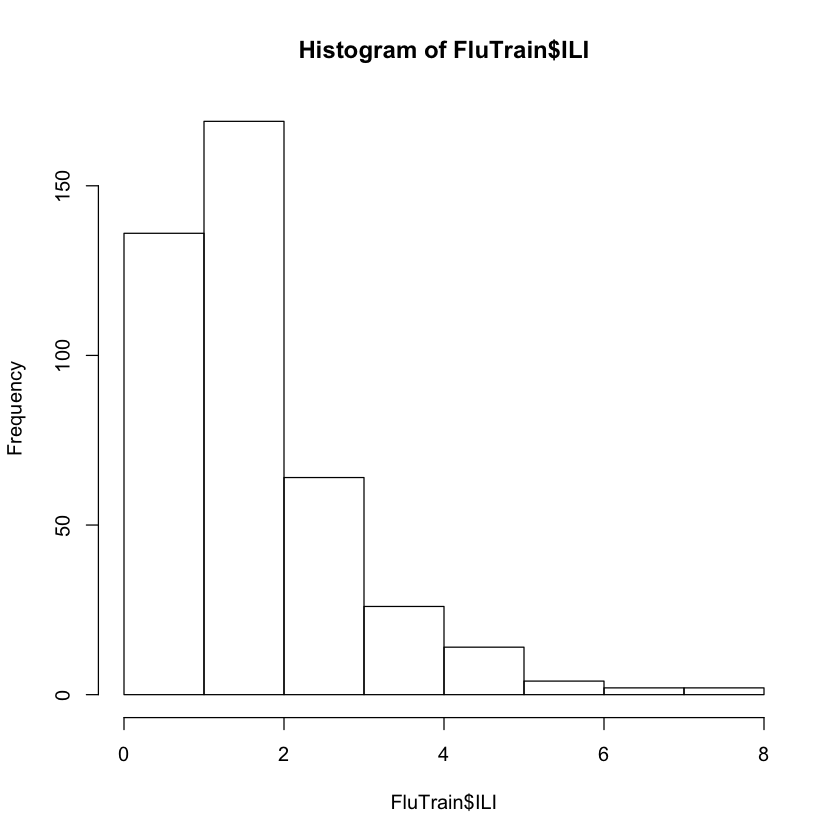

In [7]:
hist(FluTrain$ILI)

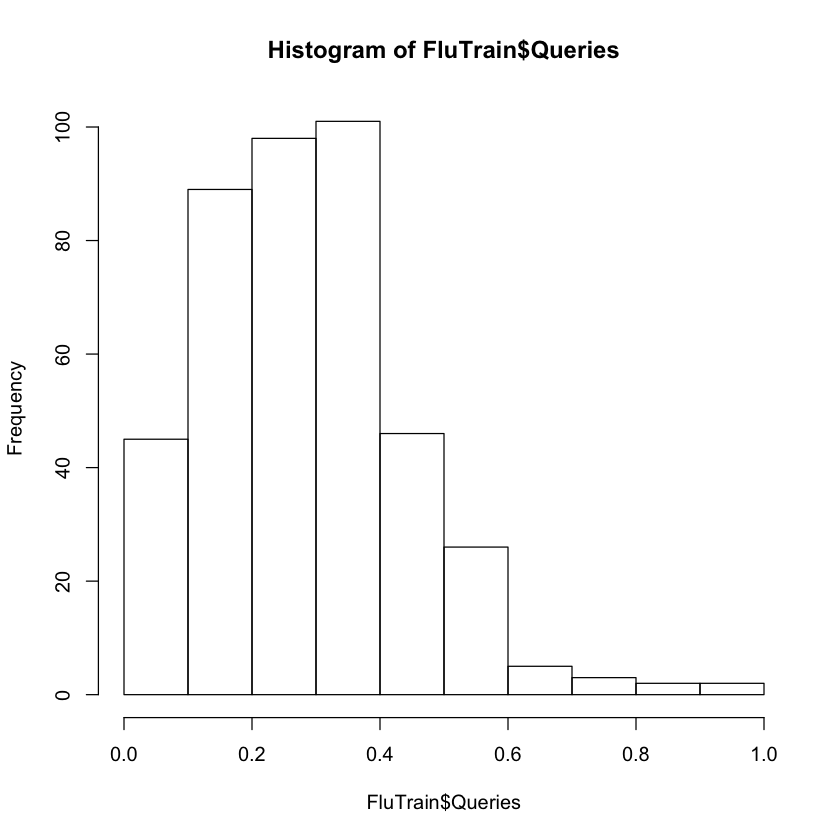

In [8]:
hist(FluTrain$Queries)

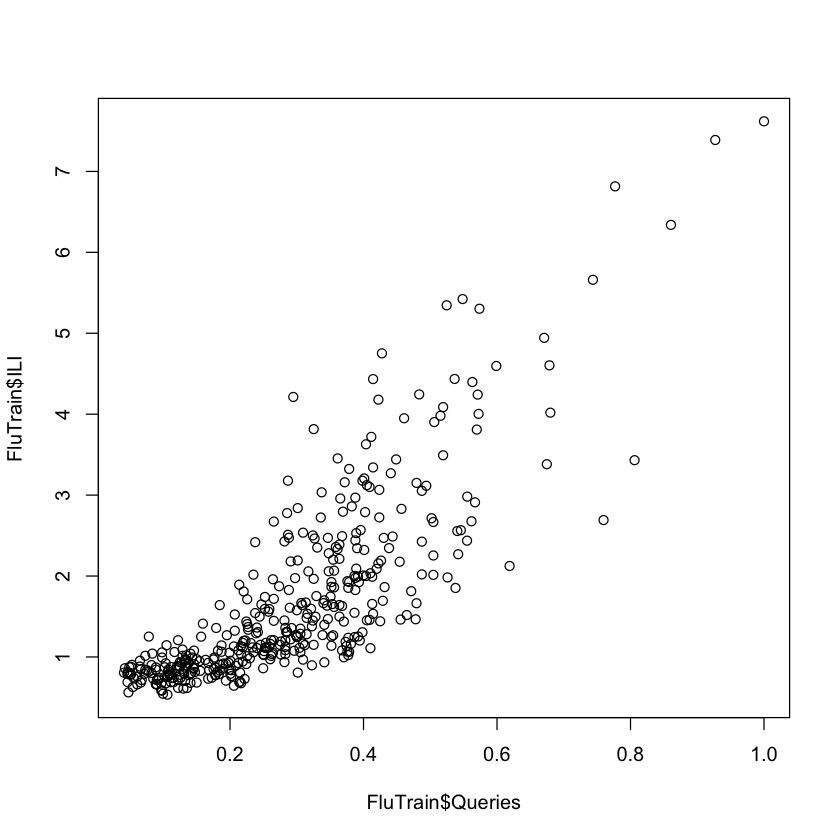

In [11]:
plot(FluTrain$Queries, FluTrain$ILI)

In [13]:
FluTrend1 = lm(log(ILI) ~ Queries, data=FluTrain)
summary(FluTrend1)


Call:
lm(formula = log(ILI) ~ Queries, data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


In [17]:
exp(-0.5*cor(log(FluTrain$ILI), FluTrain$Queries))
cor(log(FluTrain$ILI), FluTrain$Queries)^2

[1] 0.6563792

[1] 0.7090201

In [19]:
FluTest = read.csv("FluTest.csv")
PredTest1 = exp(predict(FluTrend1, newdata=FluTest))

In [20]:
?which

which {base},R Documentation
x,a logical vector or array. NAs are allowed and omitted (treated as if FALSE).
arr.ind,logical; should array indices be returned when x is an array?
ind,"integer-valued index vector, as resulting from which(x)."
.dim,dim(.) integer vector
.dimnames,"optional list of character dimnames(.). If useNames is true, to be used for constructing dimnames for arrayInd() (and hence, which(*, arr.ind=TRUE)). If names(.dimnames) is not empty, these are used as column names. .dimnames[[1]] is used as row names."
useNames,logical indicating if the value of arrayInd() should have (non-null) dimnames at all.


In [21]:
FluTest

,Week,ILI,Queries
1,2012-01-01 - 2012-01-07,1.766707,0.5936255
2,2012-01-08 - 2012-01-14,1.543401,0.499336
3,2012-01-15 - 2012-01-21,1.647615,0.500664
4,2012-01-22 - 2012-01-28,1.684297,0.4794157
5,2012-01-29 - 2012-02-04,1.863542,0.4714475
6,2012-02-05 - 2012-02-11,1.864079,0.5033201
7,2012-02-12 - 2012-02-18,2.019927,0.5139442
8,2012-02-19 - 2012-02-25,2.103851,0.500664
9,2012-02-26 - 2012-03-03,2.095549,0.4608234
10,2012-03-04 - 2012-03-10,2.103983,0.4581673


In [22]:
PredTest1[11]

11 
2.187378

In [23]:
(FluTest$ILI[11] - PredTest1[11]) / FluTest$ILI[11]

11 
0.04623827

In [24]:
RMSE = sqrt(mean((PredTest1-FluTest$ILI)^2))

In [25]:
RMSE

[1] 0.7490645

In [35]:
#Use command conda install -c r r-zoo
library(zoo)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [36]:
ILILag2 = lag(zoo(FluTrain$ILI), -2, na.pad=TRUE)

FluTrain$ILILag2 = coredata(ILILag2)

In [38]:
summary(ILILag2)

     Index        ILILag2      
 Min.   :  1   Min.   :0.5341  
 1st Qu.:105   1st Qu.:0.9010  
 Median :209   Median :1.2519  
 Mean   :209   Mean   :1.6754  
 3rd Qu.:313   3rd Qu.:2.0580  
 Max.   :417   Max.   :7.6189  
               NA's   :2       

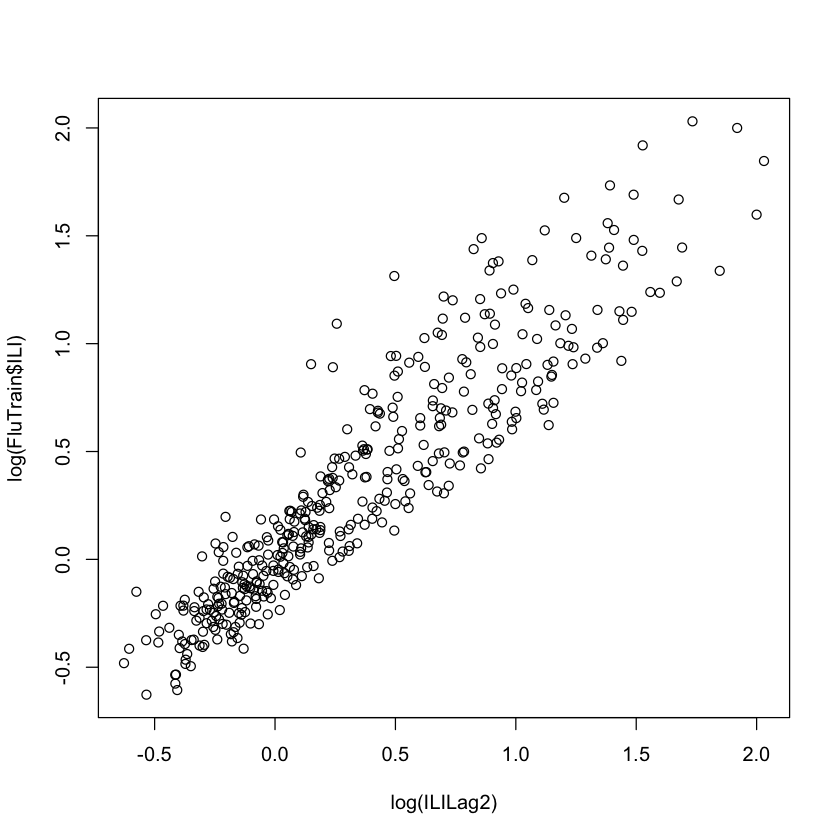

In [42]:
plot(log(ILILag2), log(FluTrain$ILI))

In [43]:
FluTrend2 = lm(log(ILI) ~ Queries + log(ILILag2), data=FluTrain)

In [44]:
summary(FluTrend2)


Call:
lm(formula = log(ILI) ~ Queries + log(ILILag2), data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52209 -0.11082 -0.01819  0.08143  0.76785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24064    0.01953  -12.32   <2e-16 ***
Queries       1.25578    0.07910   15.88   <2e-16 ***
log(ILILag2)  0.65569    0.02251   29.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1703 on 412 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9059 
F-statistic:  1993 on 2 and 412 DF,  p-value: < 2.2e-16


In [45]:
ILILag2Test = lag(zoo(FluTest$ILI), -2, na.pad=TRUE)

FluTest$ILILag2 = coredata(ILILag2Test)

In [46]:
summary(ILILag2Test)

     Index        ILILag2Test    
 Min.   : 1.00   Min.   :0.9018  
 1st Qu.:13.75   1st Qu.:1.1359  
 Median :26.50   Median :1.3409  
 Mean   :26.50   Mean   :1.5188  
 3rd Qu.:39.25   3rd Qu.:1.7606  
 Max.   :52.00   Max.   :3.6002  
                 NA's   :2       

In [47]:
str(FluTrain)

'data.frame':	417 obs. of  4 variables:
 $ Week   : Factor w/ 417 levels "2004-01-04 - 2004-01-10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ILI    : num  2.42 1.81 1.71 1.54 1.44 ...
 $ Queries: num  0.238 0.22 0.226 0.238 0.224 ...
 $ ILILag2: num  NA NA 2.42 1.81 1.71 ...


In [55]:
FluTrain$ILI[417]
FluTest$ILILag2[1] = FluTrain$ILI[416]
FluTest$ILILag2[2] = FluTrain$ILI[417]
FluTest$ILILag2

[1] 2.12413

[1] 1.8527356 2.1241299 1.7667069 1.5434005 1.6476154 1.6842972 1.8635415
 [8] 1.8640793 2.0199272 2.1038510 2.0955493 2.1039832 2.2934216 1.9222345
[15] 1.7423860 1.6760138 1.4963706 1.3811978 1.2884929 1.3578416 1.3076279
[22] 1.2669188 1.2773098 1.2990197 1.1623532 1.0861211 1.0567958 1.0787129
[29] 1.0467024 0.9281519 0.9019358 0.9160412 0.9524073 0.9164542 0.9017871
[36] 1.0331514 1.0519866 1.1271337 1.1864886 1.2141531 1.2519805 1.1918833
[43] 1.3238891 1.3085430 1.3605903 1.4860247 1.6109150 1.7332935 2.3046254
[50] 2.2259966 2.9780471 3.6002297

In [56]:
PredTest2 = exp(predict(FluTrend2, newdata=FluTest))

In [57]:
RMSE2 = sqrt(mean((PredTest2-FluTest$ILI)^2))
RMSE2

[1] 0.2942029